# Лабораторная работа №4. Синтез КИХ-фильтров.
Лаборатория цифровой обработки сигналов, МФТИ

Вклад задач в итоговую оценку: 1.1-3.2 — 1 балл, 4.1 — 2 балла. Максимальная оценка ограничивается с момента наступления срока сдачи следующей лабораторной работы.

В названии файла заменить `familyname` на свою фамилию. 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import signal

In [2]:
fs = 100000
f1 = 11000
f2 = 13000
delta1 = 0.04
delta2 = 0.03
f_0 = 4300

|      Вариант                                                                  | 1    | 2    | 3    |      4 | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15   | 16   | 17   | 18   | 19   | 20   |
|:-----------------------------------------------------------------------|:-----|:-----|:-----|:-------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
| Частота  дискретизации $f_s$, кГц                                      | 100  | 100  | 100  | 100    | 100  | 200  | 200  | 200  | 200  | 200  | 100  | 100  | 100  | 100  | 100  | 200  | 200  | 200  | 200  | 200  |
| Граничная частота полосы пропускания $f_1$, кГц                        | 10   | 9    | 11   |  12    | 15   | 20   | 21   | 23   | 24   | 25   | 9    | 10   | 11   | 12   | 13   | 26   | 27   | 28   | 29   | 30   |
| Граничная частота полосы задерживания $f_2$, кГц                        | 12   | 11   | 13   |  14    | 17   | 22   | 23   | 25   | 26   | 27   | 11   | 12   | 13   | 14   | 15   | 28   | 29   | 30   | 31   | 32   |
| Максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$  | 0.05 | 0.06 | 0.04 |   0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 | 0.05 | 0.06 | 0.04 | 0.05 | 0.04 |
| Максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$ | 0.02 | 0.03 | 0.01 |   0.02 | 0.02 | 0.03 | 0.03 | 0.02 | 0.03 | 0.03 | 0.03 | 0.02 | 0.03 | 0.02 | 0.02 | 0.03 | 0.03 | 0.02 | 0.02 | 0.02 |
| Несущая частота $f_0$, кГц                                             | 3,9  | 3,8  | 3,9  |   4    | 4,6  | 5,9  | 6,5  | 6,7  | 8,1  | 7,4  | 4,5  | 5,1  | 4,3  | 5,2  | 5,3  | 5,7  | 8,2  | 9,1  | 8,7  | 9,5  |

# Модуль 1. Метод частотной выборки синтеза КИХ-фильтров

## Задача 1.1. Синтез ФНЧ по идеальной АЧХ. 

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с частотой среза $f_c=(f_1+f_2)/2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. 

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику КИХ-фильтра. Определить по виду импульсной характеристики, будет ли фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

In [3]:
N = 29
fc = (f1 + f2) / 2
v_sreza = fc / fs

print("Частота среза = ", fc, "Гц")
print("Нормированная частота дискретизации = ", v_sreza)

Частота среза =  12000.0 Гц
Нормированная частота дискретизации =  0.12


In [4]:
def ideal_lowpass(f, f_c=450, fs=2000):
    if 0 <= f <= f_c or fs-f_c <= f <=  fs:
        return 1.0 +0.0j
    else:
        return 0.0 +0.0j

In [5]:
H=np.zeros(N, dtype=complex)
for n in range(N):
    H[n]=ideal_lowpass(f=fs*n/N, f_c=fc, fs=fs)

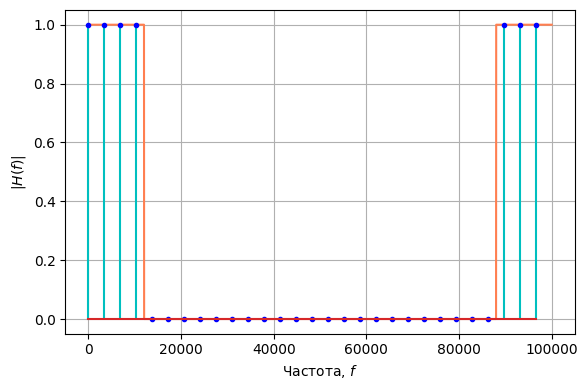

In [7]:
f_band=np.linspace(0, fs, 10240)
plt.figure(figsize=[6, 4])
plt.plot(f_band, [abs(ideal_lowpass(f, f_c=fc, fs=fs)) for f in f_band], color='coral')
plt.stem(fs*np.arange(N)/N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Частота, $f$')
plt.ylabel('$|H(f)|$')
plt.tight_layout()
plt.grid()

In [8]:
h=np.fft.ifft(H).real
M=1024
H1=abs(np.fft.fft(h, M))

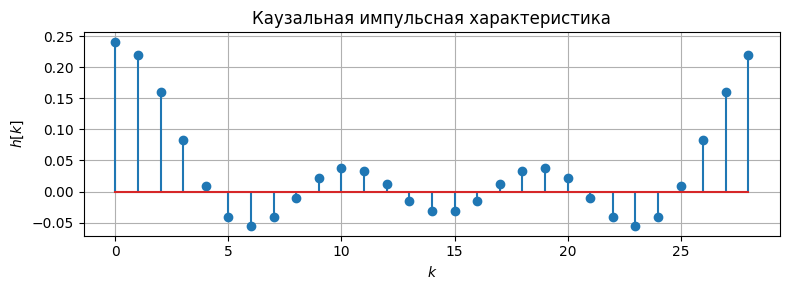

In [9]:
plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()
plt.tight_layout()

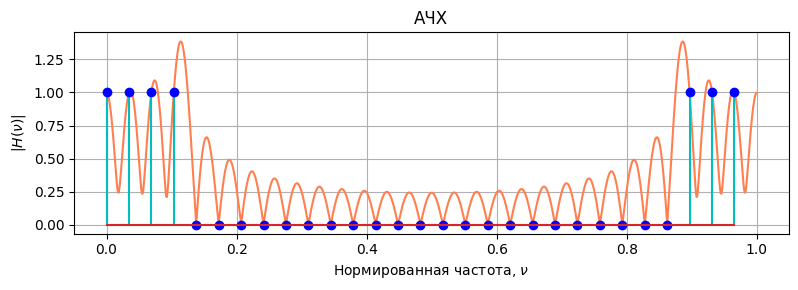

In [10]:
plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, H1, color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()


In [11]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

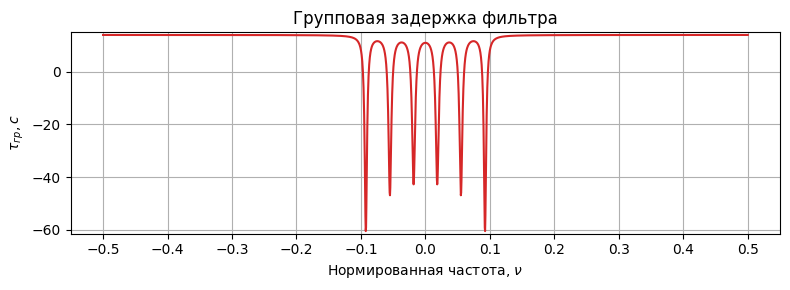

In [12]:
plt.figure(figsize=[8, 3])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
C:\Users\kirza\AppData\Local\Temp\ipykernel_19332\2197168212.py:47: SyntaxWarning: invalid escape sequence '\p'
  plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))
C:\Users\kirza\AppData\Local\Temp\ipykernel_19332\2197168212.py:47: SyntaxWarning: invalid escape sequence '\p'
  plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))


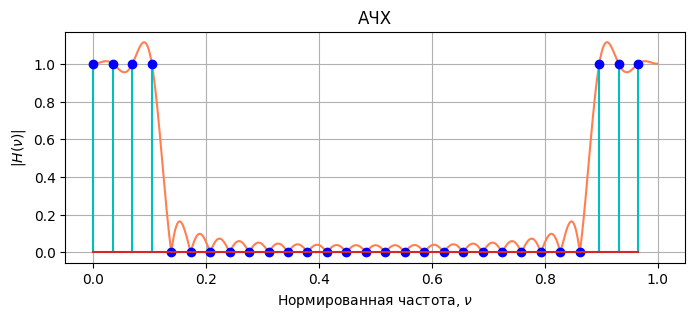

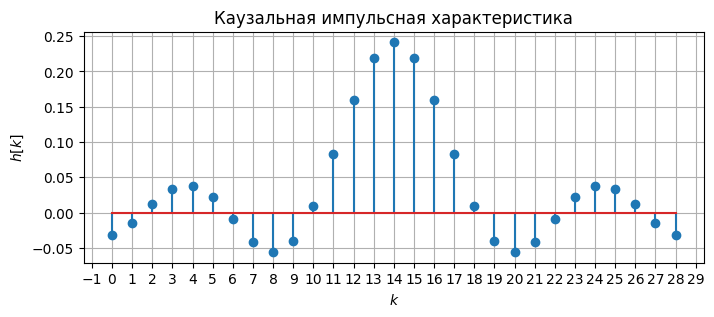

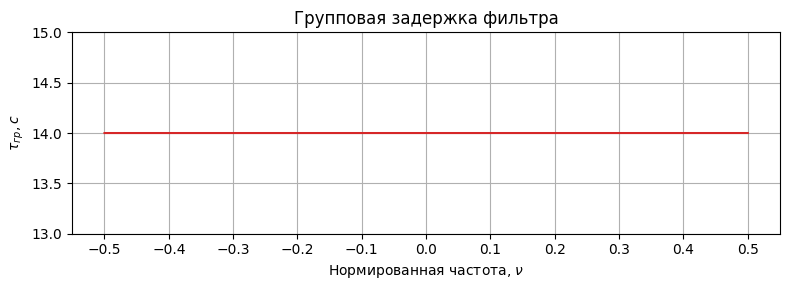

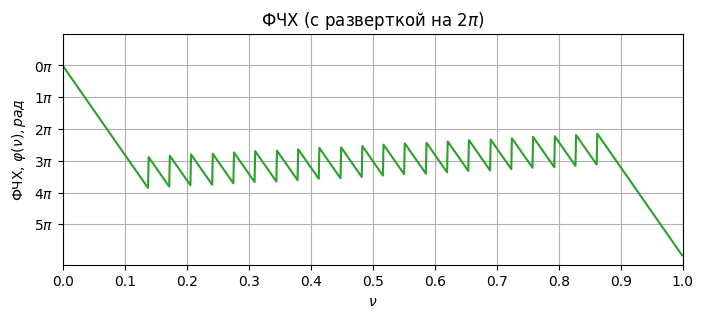

In [13]:
H=np.zeros(N, dtype=complex)
alpha=(N-1.0)/2.0
for n in range(N):
    H[n]=ideal_lowpass(f=fs*n/N, f_c=fc, fs=fs)*np.exp(-2j * np.pi * (N-1)/2.0 * n / N)

h=np.fft.ifft(H).real
M=1024
H1=abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, H1, color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')

plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

plt.figure(figsize=[8, 3])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
ax = plt.subplot(111)
H1=((np.fft.fft(h, M)))
plt.plot(np.arange(M)/M, np.unwrap(np.angle(H1)), color='C2')
plt.title("ФЧХ (с разверткой на $2\\pi$)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.xlim([0, 1])
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
y_min = np.min(np.unwrap(np.angle(H1)))
y_ticks = np.arange(0, y_min, -np.pi) if y_min < 0 else np.arange(0, -4 * np.pi, -np.pi)
y_labels = ["%i$\\pi$" % (i) for i in range(len(y_ticks))]
plt.yticks(y_ticks, y_labels)
plt.xlabel('$\\nu$')
plt.ylabel('ФЧХ, $\\varphi(\\nu), рад$')
plt.grid()

## Задача 1.2. Синтез ФНЧ по непрерывной АЧХ.

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с граничной частотой полосы пропускания $f_1$ и с граничной частотой полосы задерживания $f_2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$. Частотную характеристику идеального фильтра в полосе перехода аппроксимировать линейной функцией так, чтобы характеристика была непрерывной.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатом в задаче 1.1.

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

д) Определить частоту среза (по уровню $-3$ дБ) модельного и полученного фильтров. 

In [14]:
def ideal_lowpass2(f, f_c=fc, fs=fs, f1=f1, f2=f2):
    if 0 <= f <= f1 or fs-f1 <= f <=  fs:
        return 1.0
    elif f1<f<f2:
        return f/(f1-f2)+(f2/(f2-f1))
    elif fs-f2<f<fs-f1:
        return f/(f2-f1)+(fs-f2)/(-f2+f1)
    else:
        return 0.0

In [15]:
H=np.zeros(N, dtype=complex)
for n in range(N):
    H[n]=ideal_lowpass2(f=fs*n/N)

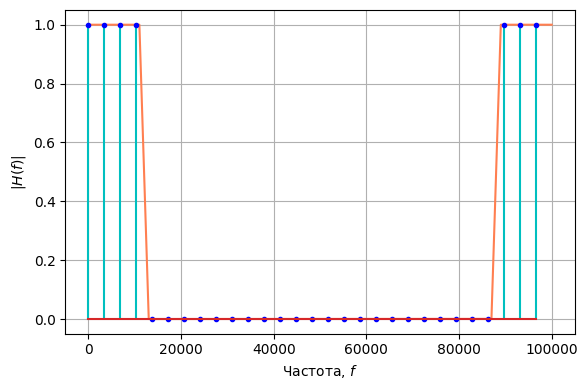

In [16]:
f_band=np.linspace(0, fs, 10240)
plt.figure(figsize=[6, 4])
plt.plot(f_band, [abs(ideal_lowpass2(f)) for f in f_band], color='coral')
plt.stem(fs*np.arange(N)/N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Частота, $f$')
plt.ylabel('$|H(f)|$')
plt.tight_layout()
plt.grid()

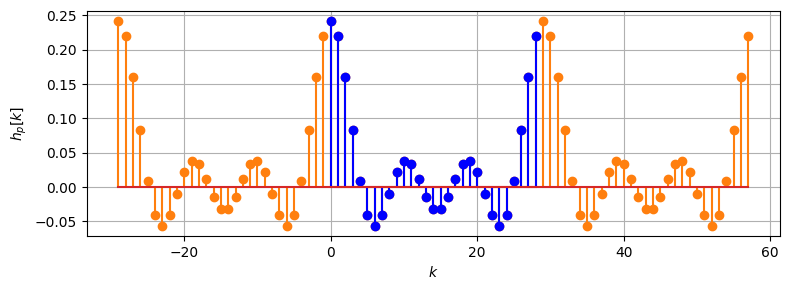

In [17]:
h=np.fft.ifft(H).real

h3=np.concatenate((h, h, h ))
plt.figure(figsize=[8, 3])
plt.stem(np.arange(3*N)-N, h3, linefmt='C1', markerfmt='C1o')
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_p[k]$')
plt.grid()
plt.tight_layout()

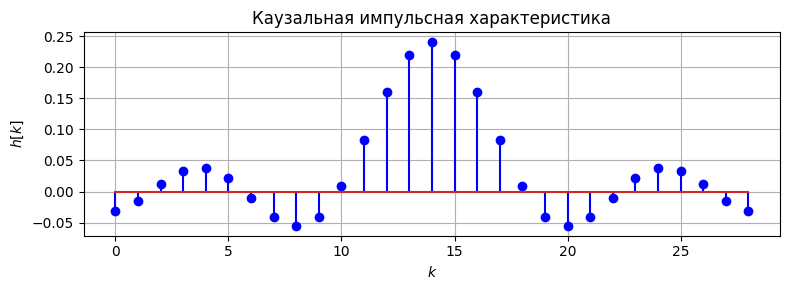

In [18]:
h=np.fft.ifft(H).real
h=np.roll(h, N//2)

plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()
plt.tight_layout()

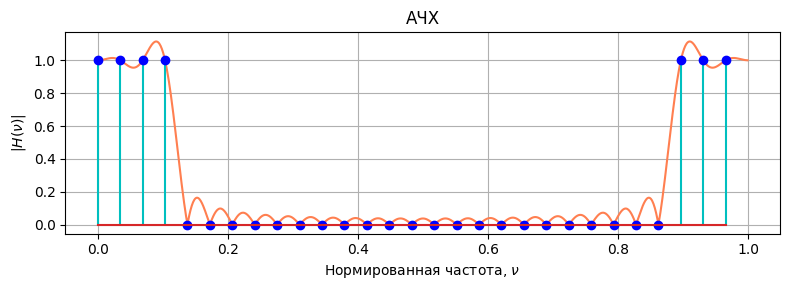

In [19]:
M=1024
H1=abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, H1, color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()

In [20]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

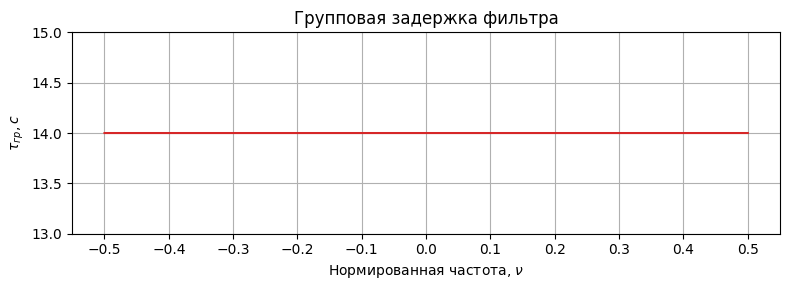

In [21]:
plt.figure(figsize=[8, 3])
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.title('Групповая задержка фильтра')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 1.3. Синтез фильтра с характеристикой «приподнятый косинус»

Синтезировать КИХ-фильтр 28 порядка ($N=29$) с частотой среза $f_c=(f_1+f_2)/2$  на основе фильтра приподнятого косинуса методом частотной выборки. Частоту дискретизации принять равной $f_s$. На интервале $[-f_s/2, f_s/2]$ частотная характеристика фильтра задается следующим образом 

$$H(f)=\left\{ \begin{matrix}
   1, & |f| < (1-\beta)f_c;\\
   \dfrac{1}{2}*\left( 1+\cos \left(\pi \dfrac{|f|-(1-\beta)f_c}{2\beta f_c} \right) \right), & (1-\beta) f_c \le |f| \le (1+\beta)f_c;  \\
   0,   &  |f| > (1+\beta)f_c. \\
\end{matrix} \right.$$

а) Подобрать такое $\beta$, чтобы модельный фильтр не выходил за максимально допустимые отклонения АЧХ в полосе пропускания и в полосе задерживания ($\delta_1$ и $\delta_2$). Изобразить полученную АЧХ фильтра.

б) Для синтезированного фильтра определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатами в задаче 1.1 и задаче 1.2.

в) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

г) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

д) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (г).

е) Определить частоту среза (по уровню $-3$ дБ) полученного фильтра. Сравнить с задачей 1.2.


In [22]:
def ideal_lowpass3(f, f_c=fc, fs=fs, beta=0.5, f1=f1, f2=f2):
    if f > fs / 2:
      f = f - fs
    if abs(f) < (1-beta)*f_c :
        return 1.0
    elif abs(f) >= (1-beta)*f_c and abs(f) <= (1+beta)*f_c:
        return 0.5 * (1 + np.cos(np.pi * (abs(f) - (1 - beta) * f_c)/(2 * beta * f_c)))
    elif abs(f) > (1 + beta) *f_c:
        return 0.0


In [23]:
H=np.zeros(N, dtype=complex)
for n in range(N):
    H[n]=ideal_lowpass3(f=fs*n/N)

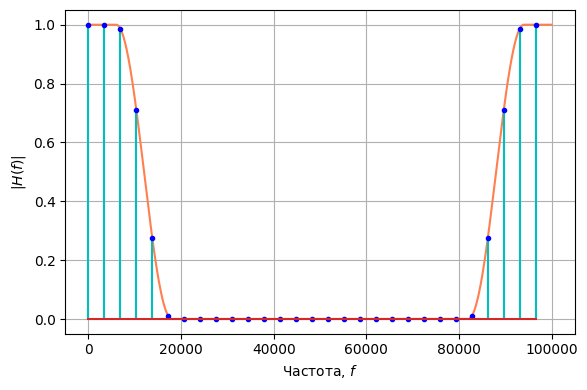

In [24]:
f_band=np.linspace(0, fs, 1024)
plt.figure(figsize=[6, 4])
plt.plot(f_band, [abs(ideal_lowpass3(f)) for f in f_band], color='coral')
plt.stem(fs*np.arange(N)/N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Частота, $f$')
plt.ylabel('$|H(f)|$')
plt.tight_layout()
plt.grid()

f_band=np.linspace(0, fs, 1024)
plt.figure(figsize=[6, 4])
plt.plot(f_band, [abs(ideal_lowpass3(f)) for f in f_band], color='coral')
plt.stem(fs*np.arange(N)/N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Частота, $f$')
plt.ylabel('$|H(f)|$')
plt.tight_layout()
plt.grid()

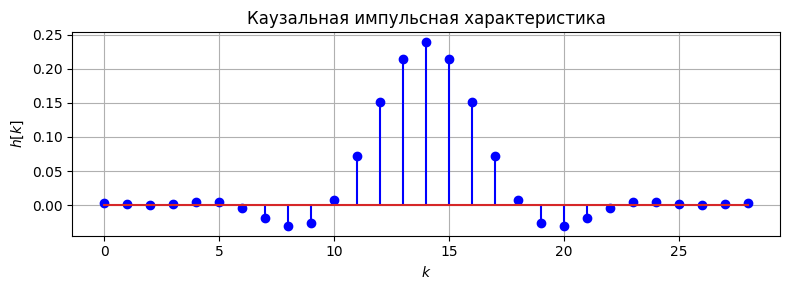

In [25]:
h=np.fft.ifft(H).real
h=np.roll(h, N//2)

plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()
plt.tight_layout()

In [26]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

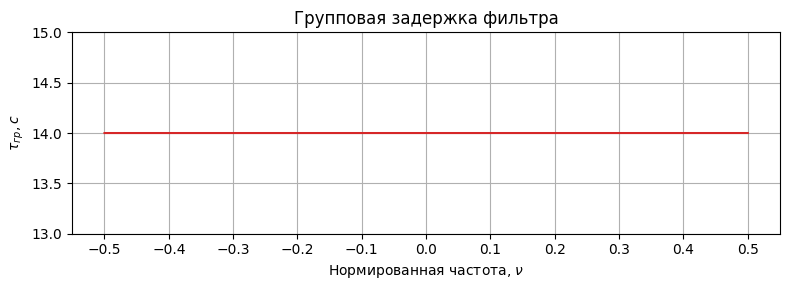

In [27]:
plt.figure(figsize=[8, 3])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

#  Модуль 2. Метод окон для синтеза КИХ-фильтров

### Задача 2.1. Сравнение АЧХ фильтров одного порядка 
Синтезировать КИХ-фильтры нижних частот c частотой среза $f_c$ при частоте дискретизации $f_s$ порядка $R=28$ ($N=29$) с использованием следующих окон:

* прямоугольное (окно Дирихле)
$$w[k]=\left\{ \begin{matrix}
   1,  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

* окно Ханна 
$$w[k]=\left\{ \begin{matrix}
   0,5-0,5\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Хэмминга
$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Блэкмана
$$w[k]=\left\{ \begin{matrix}
   0,42-0,5\cos \dfrac{2\pi k}{N-1}+0,08\cos \dfrac{4\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

Построить графики оконной функции $w[k]$, импульсной характеристики КИХ-фильтра $h[k]$, АЧХ КИХ-фильтра(в линейном масштабе и в дБ). Определить по графикам максимальный уровень пульсаций по полосе задерживания в дБ. Заполнить таблицу. Частоту среза определять по уровню -3дБ.

In [28]:
N = 29
R = N - 1
cutoff = (f1 + f2) / 2

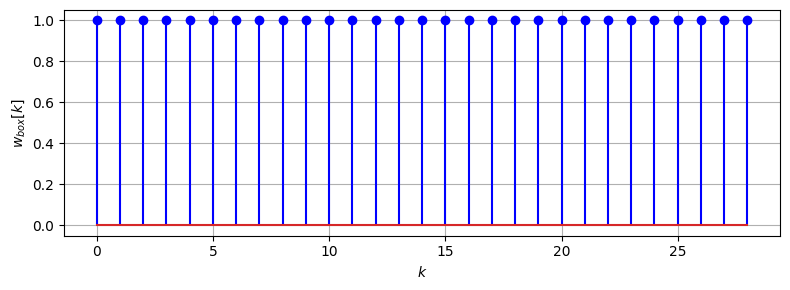

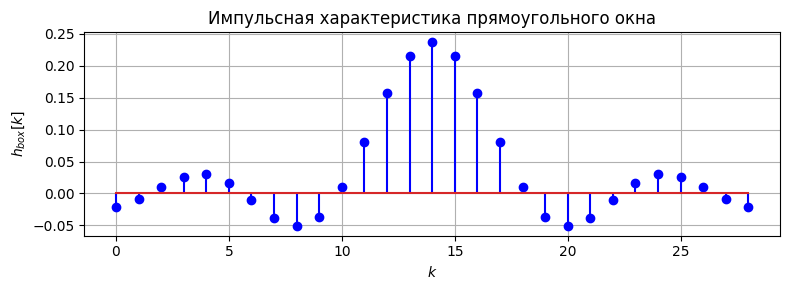

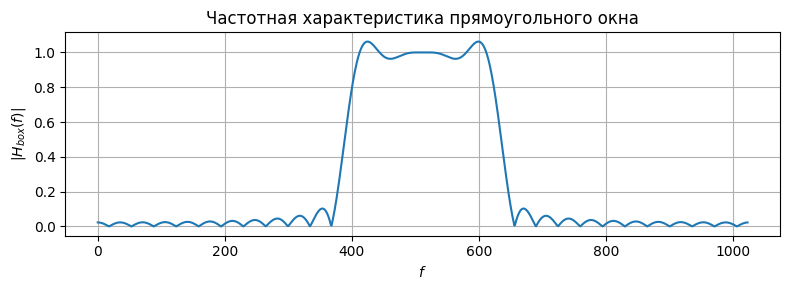

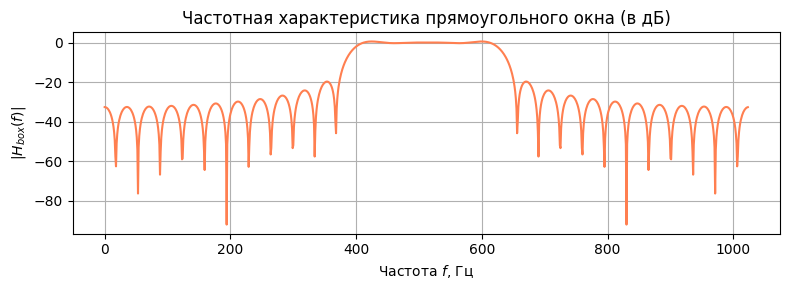

In [29]:
k = np.arange(0, N, 1)
w = signal.windows.boxcar(N, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(k, w, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$w_{box}[k]$')

plt.grid()
plt.tight_layout()


h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='boxcar', pass_zero='lowpass', fs=fs)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_{box}[k]$')
plt.title("Импульсная характеристика прямоугольного окна")
plt.grid()
plt.tight_layout()


H=abs(np.fft.fftshift(np.fft.fft(h, 1024)))
plt.figure(figsize=[8, 3])
plt.plot(H)
plt.xlabel('$f$')
plt.ylabel('$|H_{box}(f)|$')
plt.title("Частотная характеристика прямоугольного окна")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
plt.plot(20 * np.log10(H), color='coral')
plt.grid()
plt.ylabel('$|H_{box}(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title(f'Частотная характеристика прямоугольного окна (в дБ)')
plt.tight_layout()
plt.show()

In [30]:
h = signal.firwin(numtaps=N, cutoff=f1, window='boxcar', pass_zero='lowpass', fs=fs)
H = np.fft.fft(h, 1024)
H = np.abs(H[:512]) 
H_dB = 20 * np.log10(H / np.max(H))
freqs = np.fft.fftfreq(1024, d=1/fs)[:512]  
idx_3dB = np.where(H_dB <= -3)[0]
if len(idx_3dB) > 0:
    fs_box = freqs[idx_3dB[0]]

idx_passband = np.where(freqs <= f1)[0]  
ripple_max = np.max(H_dB[idx_passband]) 
ripple_min = np.min(H_dB[idx_passband]) 
delt_box = ripple_max - ripple_min 

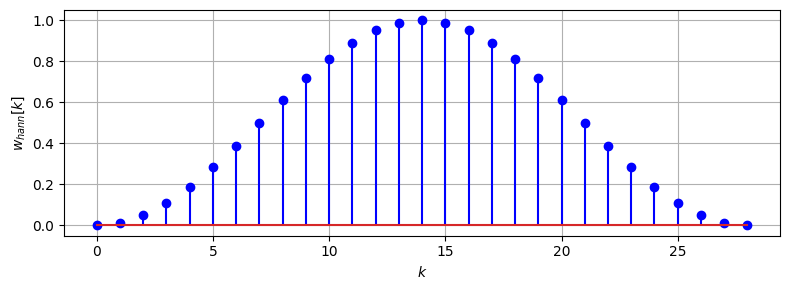

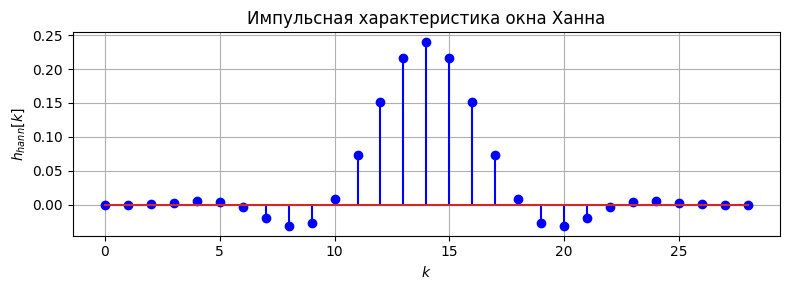

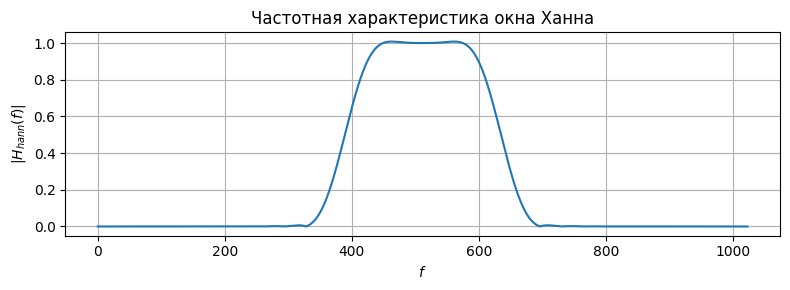

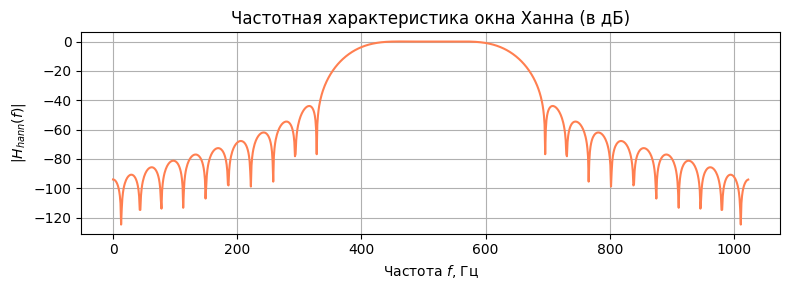

In [31]:
k = np.arange(0, N, 1)
w = signal.windows.hann(N, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(k, w, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$w_{hann}[k]$')

plt.grid()
plt.tight_layout()


h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='hann', pass_zero='lowpass', fs=fs)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_{hann}[k]$')
plt.title("Импульсная характеристика окна Ханна")
plt.grid()
plt.tight_layout()


H=abs(np.fft.fftshift(np.fft.fft(h, 1024)))
plt.figure(figsize=[8, 3])
plt.plot(H)
plt.xlabel('$f$')
plt.ylabel('$|H_{hann}(f)|$')
plt.title("Частотная характеристика окна Ханна")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
plt.plot(20 * np.log10(H), color='coral')
plt.grid()
plt.ylabel('$|H_{hann}(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title(f'Частотная характеристика окна Ханна (в дБ)')
plt.tight_layout()
plt.show()

In [32]:
h = signal.firwin(numtaps=N, cutoff=f1, window='hann', pass_zero='lowpass', fs=fs)
H = np.fft.fft(h, 1024)
H = np.abs(H[:512]) 
H_dB = 20 * np.log10(H / np.max(H))
freqs = np.fft.fftfreq(1024, d=1/fs)[:512]  
idx_3dB = np.where(H_dB <= -3)[0]
if len(idx_3dB) > 0:
    fs_hann = freqs[idx_3dB[0]]

idx_passband = np.where(freqs <= f1)[0]  
ripple_max = np.max(H_dB[idx_passband]) 
ripple_min = np.min(H_dB[idx_passband]) 
delt_hann = ripple_max - ripple_min 

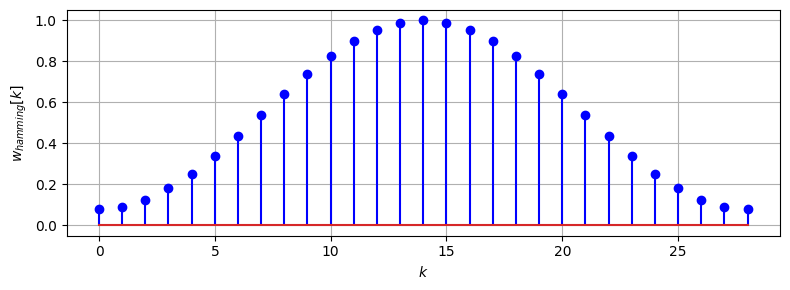

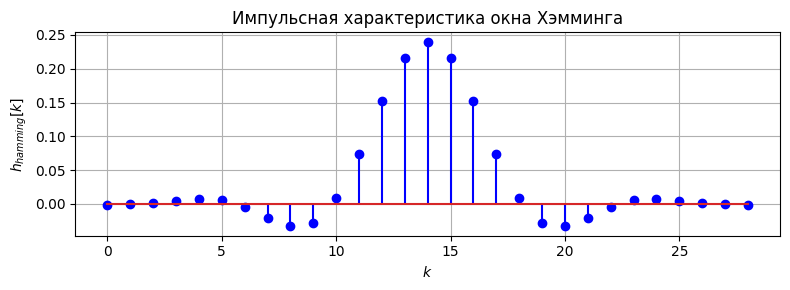

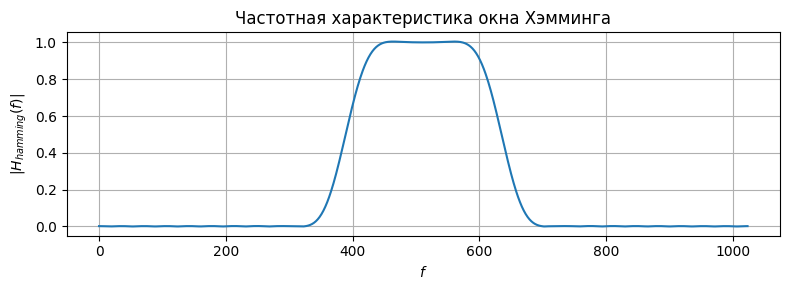

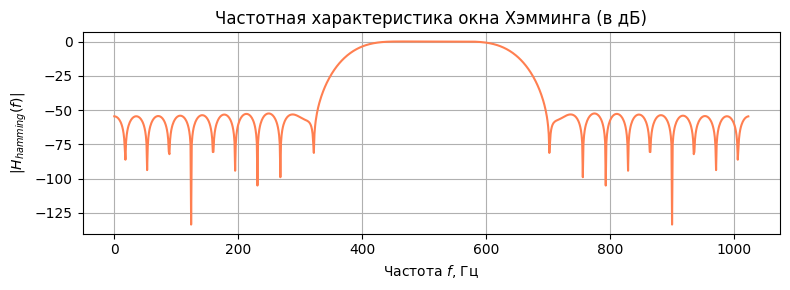

In [33]:
k = np.arange(0, N, 1)
w = signal.windows.hamming(N, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(k, w, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$w_{hamming}[k]$')

plt.grid()
plt.tight_layout()


h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='hamming', pass_zero='lowpass', fs=fs)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_{hamming}[k]$')
plt.title("Импульсная характеристика окна Хэмминга")
plt.grid()
plt.tight_layout()


H=abs(np.fft.fftshift(np.fft.fft(h, 1024)))
plt.figure(figsize=[8, 3])
plt.plot(H)
plt.xlabel('$f$')
plt.ylabel('$|H_{hamming}(f)|$')
plt.title("Частотная характеристика окна Хэмминга")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
plt.plot(20 * np.log10(H), color='coral')
plt.grid()
plt.ylabel('$|H_{hamming}(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title(f'Частотная характеристика окна Хэмминга (в дБ)')
plt.tight_layout()
plt.show()

In [34]:
h = signal.firwin(numtaps=N, cutoff=f1, width=None, window='hamming', pass_zero='lowpass', fs=fs)
H = np.fft.fft(h, 1024)
H = np.abs(H[:512]) 
H_dB = 20 * np.log10(H / np.max(H))
freqs = np.fft.fftfreq(1024, d=1/fs)[:512]  
idx_3dB = np.where(H_dB <= -3)[0]
if len(idx_3dB) > 0:
    fs_hamming = freqs[idx_3dB[0]]

idx_passband = np.where(freqs <= f1)[0]  
ripple_max = np.max(H_dB[idx_passband]) 
ripple_min = np.min(H_dB[idx_passband]) 
delt_hamming = ripple_max - ripple_min 

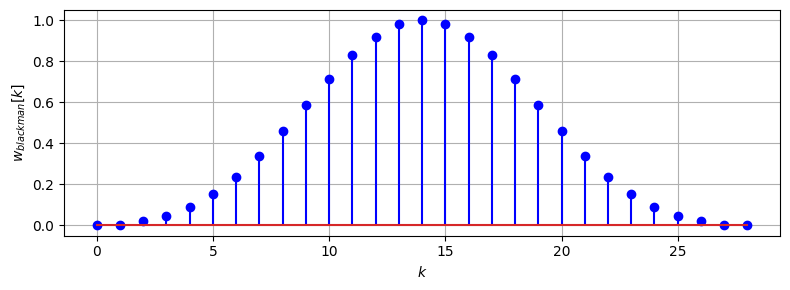

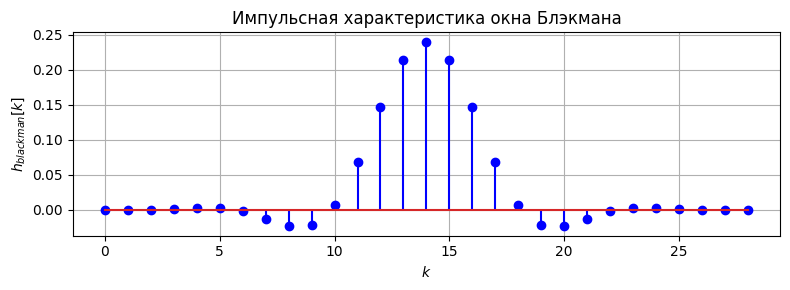

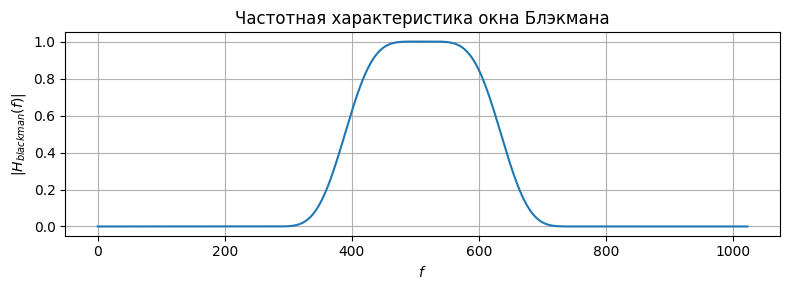

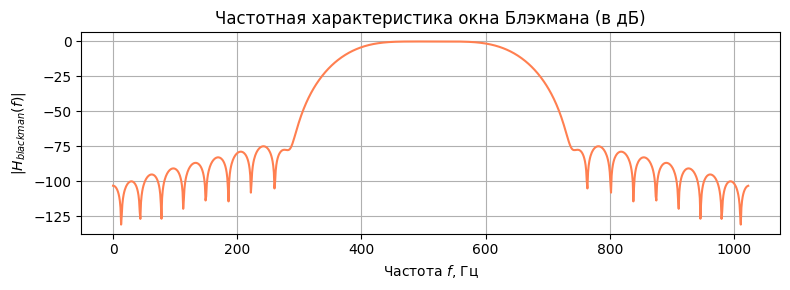

In [35]:
k = np.arange(0, N, 1)
w = signal.windows.blackman(N, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(k, w, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$w_{blackman}[k]$')

plt.grid()
plt.tight_layout()


h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='blackman', pass_zero='lowpass', fs=fs)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(N), h, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$h_{blackman}[k]$')
plt.title("Импульсная характеристика окна Блэкмана")
plt.grid()
plt.tight_layout()


H=abs(np.fft.fftshift(np.fft.fft(h, 1024)))
plt.figure(figsize=[8, 3])
plt.plot(H)
plt.xlabel('$f$')
plt.ylabel('$|H_{blackman}(f)|$')
plt.title("Частотная характеристика окна Блэкмана")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
plt.plot(20 * np.log10(H), color='coral')
plt.grid()
plt.ylabel('$|H_{blackman}(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title(f'Частотная характеристика окна Блэкмана (в дБ)')
plt.tight_layout()
plt.show()

In [36]:
h = signal.firwin(numtaps=N, cutoff=f1, width=None, window='blackman', pass_zero='lowpass', fs=fs)
H = np.fft.fft(h, 1024)
H = np.abs(H[:512]) 
H_dB = 20 * np.log10(H / np.max(H))
freqs = np.fft.fftfreq(1024, d=1/fs)[:512]  
idx_3dB = np.where(H_dB <= -3)[0]
if len(idx_3dB) > 0:
    fs_blackman = freqs[idx_3dB[0]]

idx_passband = np.where(freqs <= f1)[0]  
ripple_max = np.max(H_dB[idx_passband]) 
ripple_min = np.min(H_dB[idx_passband]) 
delt_blackman = ripple_max - ripple_min 

In [37]:
# заполненние таблицы через pandas
import pandas as pd
plot_data = {}
plot_data["Окно Дирихле"]  = [f"{fs_box:.2f}", f"{delt_box:.4f}"]
plot_data["Окно Ханна"]    = [f"{fs_hann:.2f}", f"{delt_hann:.4f}"]
plot_data["Окно Хэмминга"] = [f"{fs_hamming:.2f}", f"{delt_hamming:.4f}"]
plot_data["Окно Блэкмана"] = [f"{fs_blackman:.2f}", f"{delt_blackman:.4f}"]

df2_1 = pd.DataFrame(data=plot_data, columns = plot_data.keys(),
            index=['Частота среза фильтра, Гц', 'Максимальный уровень пульсаций  фильтра, дБ'])
# генерировать markdown таблицу 
# print(df2_1.to_markdown())
df2_1

,Окно Дирихле,Окно Ханна,Окно Хэмминга,Окно Блэкмана
"Частота среза фильтра, Гц",9960.94,9472.66,9570.31,9179.69
"Максимальный уровень пульсаций фильтра, дБ",6.6684,5.9274,5.8775,5.8908


### Задача 2.2. Синтез ФНЧ с окном Хемминга. 

Синтезировать КИХ-фильтр нижних частот с окном Хемминга наименьшего порядка при заданных требованиях к АЧХ:
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Воспользоваться следующей итерационной процедурой [1]:

1) Оценить длину окна по формуле 

$$\hat{N}=\left[\dfrac{3,3 f_s}{\Delta f} \right], \;\;  \Delta f=f_2-f_1$$

2) Взвесить импульсную характеристику идеального фильтра c ФЧХ $\varphi(\theta)=- \dfrac{R}{2} \theta$ окном Хэмминга выбранной длины (``scipy.firwin``, $f_c=(f_1+f_2)/2$).

$$h[k]=\left\{ \begin{matrix}
   {{h}_{\text{ideal}}}[k]w[k],  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Проверку требований к АЧХ можно произвести по графику, используя
* backend notebook `%matplotlib notebook` (в Jupyter Notebook)
* `plt.xlim()` и `plt.ylim()` (в Google Colab или в Jupyter Notebook)

Приведите графики АЧХ КИХ-фильтра с начальным ($\hat{R}=\hat{N}-1$) и конечным $R_\min$ порядками в итерационной процедуре. 
______

[1] Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).

P.S. Есть в библиотеке МФТИ. 
______

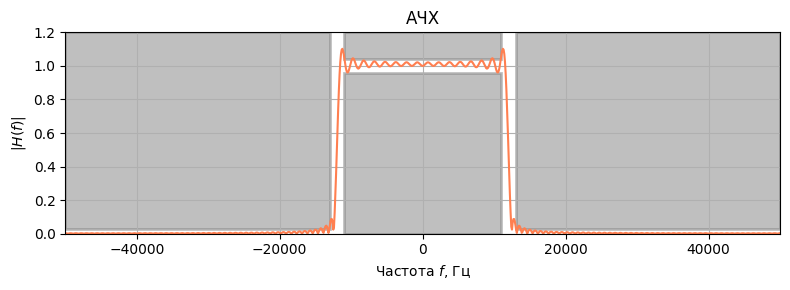

In [ ]:
N =135
N_hem = N
M=1024
h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='boxcar', pass_zero='lowpass', fs=fs)
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

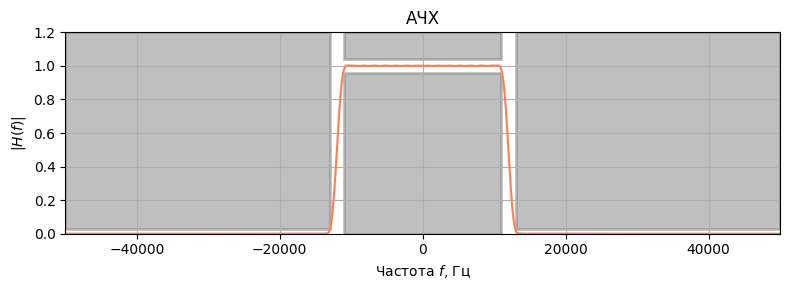

In [39]:
w = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='hamming', pass_zero='lowpass', fs=fs)
H2=abs(np.fft.fftshift(np.fft.fft(w, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H2, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

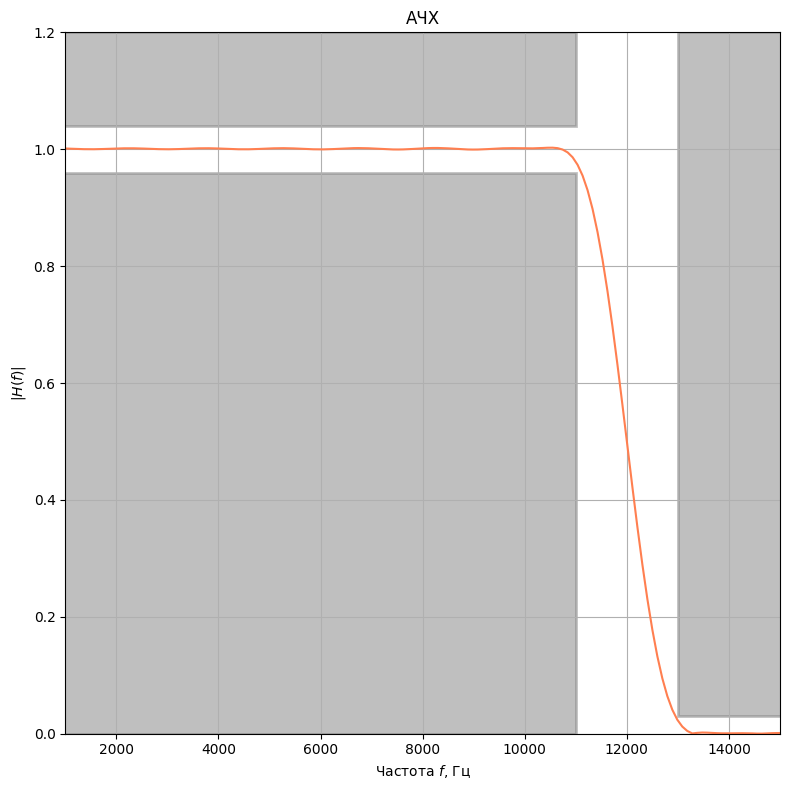

In [40]:
M=1024
plt.figure(figsize=[8, 8])
plt.plot(fs*(np.arange(M)/M-0.5), H2, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.xlim([1000, 15000])
plt.tight_layout()
plt.show()

## Задача 2.3. Синтез ФНЧ с окном Кайзера.

Синтезировать КИХ-фильтр нижних частот с окном Кайзера наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Параметр $\beta$ и длину окна $N$ определить по эмпирическим формулам, приведенным в лекции, или с помощью функции `signal.kaiserord`. Привести график АЧХ получившегося фильтра, сравнить порядок с фильтром из задачи 2.2. 

In [41]:
a = 20*np.log10(min(delta1, delta2))
a

np.float64(-30.45757490560675)

In [42]:
beta = signal.kaiser_beta(a=np.abs(a))
beta

np.float64(2.1808956221464677)

In [43]:
N, beta=signal.kaiserord(ripple=np.abs(a), width=(f2-f1)/(fs/2))
N_kaz = N
N

80

In [44]:
beta

np.float64(2.1808956221464677)

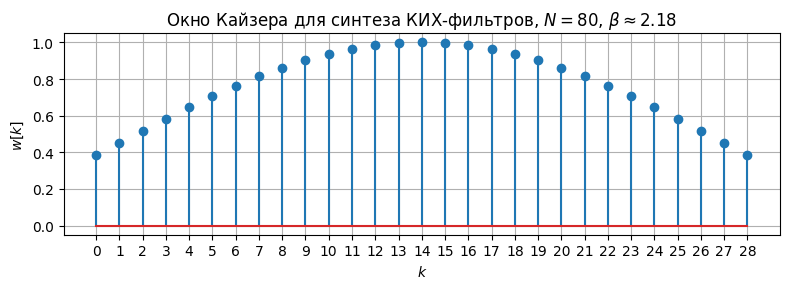

In [45]:
w=signal.windows.kaiser(M=R+1, beta=beta, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(w.size), w)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("Окно Кайзера для синтеза КИХ-фильтров, $N=$%i, $\\beta \\approx $%.2f" %(N, beta))
plt.xticks(np.arange(w.size))
plt.tight_layout()

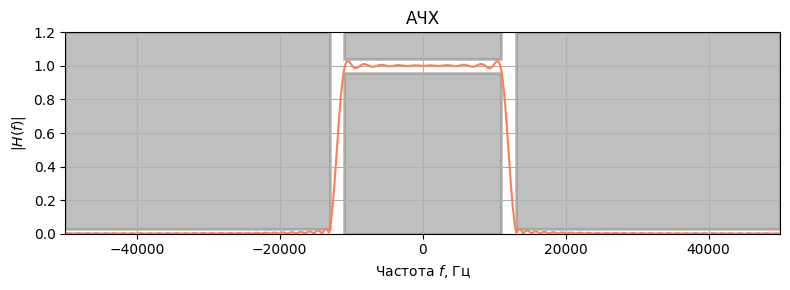

In [46]:
h = signal.firwin(numtaps=N, cutoff=cutoff, window=('kaiser', beta), pass_zero='lowpass', fs=fs)
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

#  Модуль 3. Оптимизационные методы синтеза КИХ-фильтров

## Задача 3.1. Метод наименьших квадратов.

Синтезировать КИХ-фильтр методом наименьших квадратов наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.firls`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

In [47]:
N_kv=N = 80+21
N

101

In [48]:
bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 1, 0, 0])
weight = np.array([0.5, 1])
h=signal.firls(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

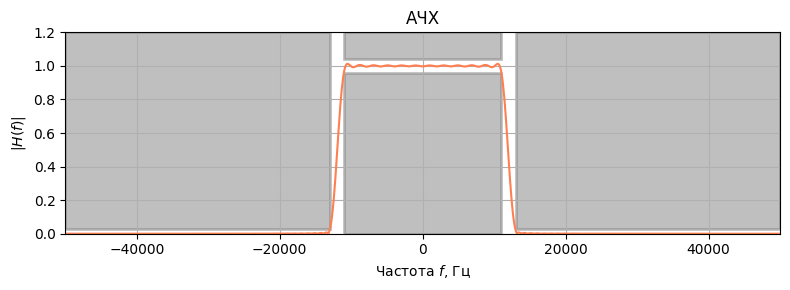

In [49]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

In [50]:
fs/2

50000.0

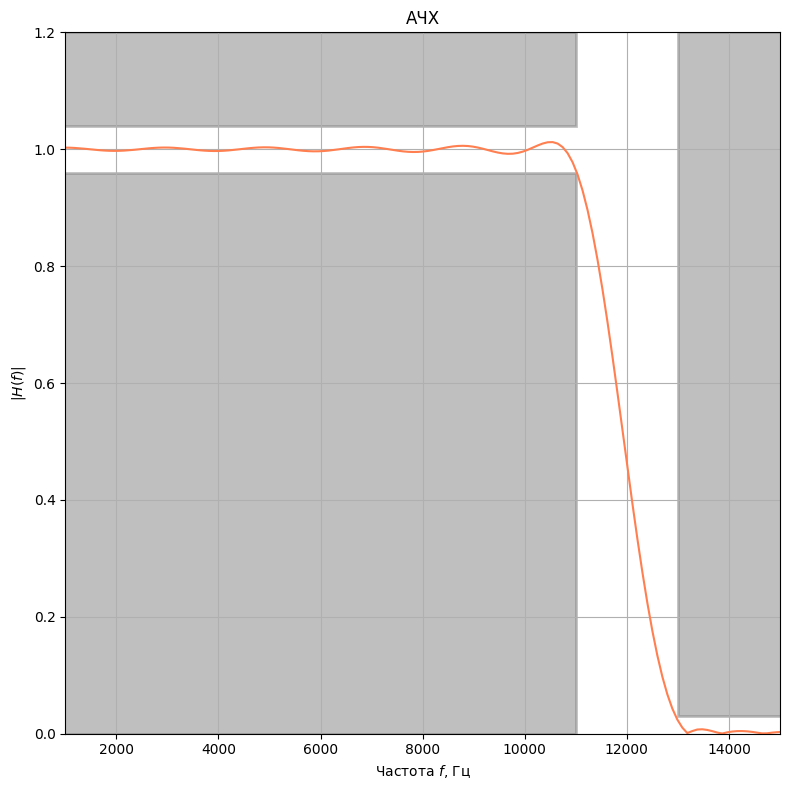

In [51]:
M=1024
plt.figure(figsize=[8, 8])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.xlim([1000, 15000])
plt.tight_layout()
plt.show()

## Задача 3.2. Метод равномерной чебышевской аппроксимации.

Синтезировать КИХ-фильтр методом равномерной чебышевской аппроксимации наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.remez`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

In [52]:
N_cheb = N = 80+(-1)
N

79

In [53]:
bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 0])
weight = np.array([0.5, 1])
h = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

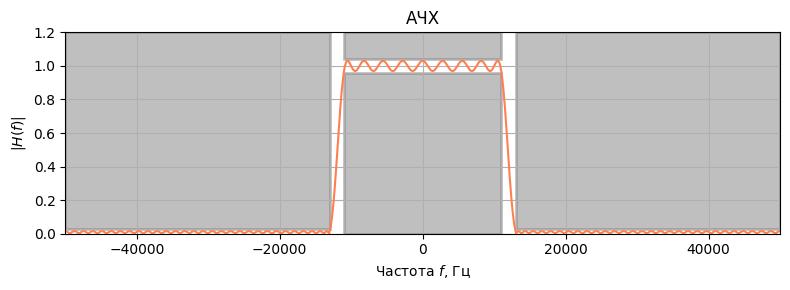

In [54]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

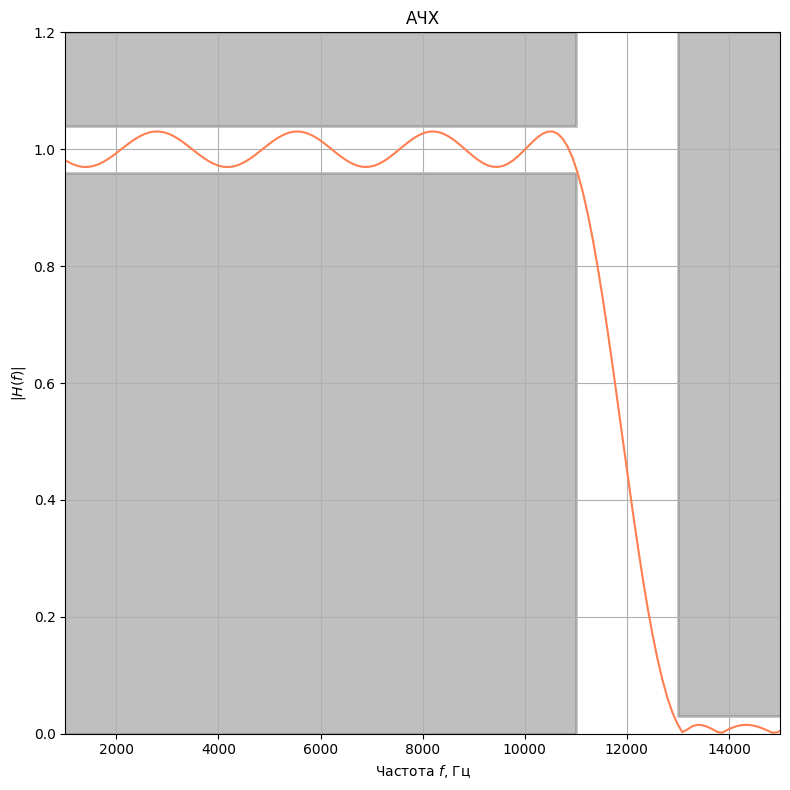

In [55]:
M=1024
plt.figure(figsize=[8, 8])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.xlim([1000, 15000])
plt.tight_layout()
plt.show()

## Задача 3.3. Сравнение результатов.

Сравнить минимальные порядки КИХ-фильтров, которые получились в задачах 2.2, 2.3, 3.1 и 3.2. Заполнить таблицу. Определить, будут ли выполняться требование из этих задач для фильтра минимального из получившихся порядков, построенного методом частотной выборки (как в задаче 1.2).


In [56]:
# заполненние таблицы через pandas
import pandas as pd
plot_data = {}
plot_data["Оконный метод (окно Хэмминга)"]  = [f"{N_hem-1}", f"{N_hem}"]
plot_data["Оконный метод (окно Кайзера)"]    = [f"{N_kaz-1}", f"{N_kaz}"]
plot_data["Метод наименьших квадратов"] = [f"{N_kv-1}", f"{N_kv}"]
plot_data["Метод равномерной чебышевской аппроксимации"] = [f"{N_cheb - 1}", f"{N_cheb}"]

df3_3 = pd.DataFrame(data=plot_data, columns = plot_data.keys(),
            index=["$$R_\min$$", "$$N_\min$$"]).T
# генерировать markdown таблицу 
# print(df3_3.to_markdown())
df3_3

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kirza\AppData\Local\Temp\ipykernel_19332\992907461.py:10: SyntaxWarning: invalid escape sequence '\m'
  index=["$$R_\min$$", "$$N_\min$$"]).T
C:\Users\kirza\AppData\Local\Temp\ipykernel_19332\992907461.py:10: SyntaxWarning: invalid escape sequence '\m'
  index=["$$R_\min$$", "$$N_\min$$"]).T


,$$R_\min$$,$$N_\min$$
Оконный метод (окно Хэмминга),134,135
Оконный метод (окно Кайзера),79,80
Метод наименьших квадратов,100,101
Метод равномерной чебышевской аппроксимации,78,79


In [57]:
N = 79

In [58]:
def ideal_lowpass2(f, f_c=fc, fs=fs, f1=f1, f2=f2):
    if 0 <= f <= f1 or fs-f1 <= f <=  fs:
        return 1.0
    elif f1<f<f2:
        return f/(f1-f2)+(f2/(f2-f1))
    elif fs-f2<f<fs-f1:
        return f/(f2-f1)+(fs-f2)/(-f2+f1)
    else:
        return 0.0

In [59]:
H=np.zeros(N, dtype=complex)
for n in range(N):
    H[n]=ideal_lowpass2(f=fs*n/N)

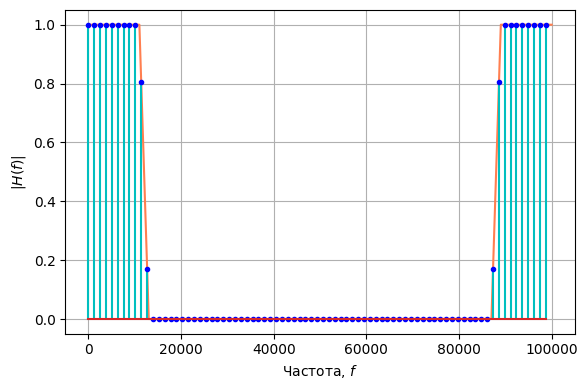

In [60]:
f_band=np.linspace(0, fs, 10240)
plt.figure(figsize=[6, 4])
plt.plot(f_band, [abs(ideal_lowpass2(f)) for f in f_band], color='coral')
plt.stem(fs*np.arange(N)/N, abs(H), linefmt='c', markerfmt='b.')
plt.xlabel('Частота, $f$')
plt.ylabel('$|H(f)|$')
plt.tight_layout()
plt.grid()

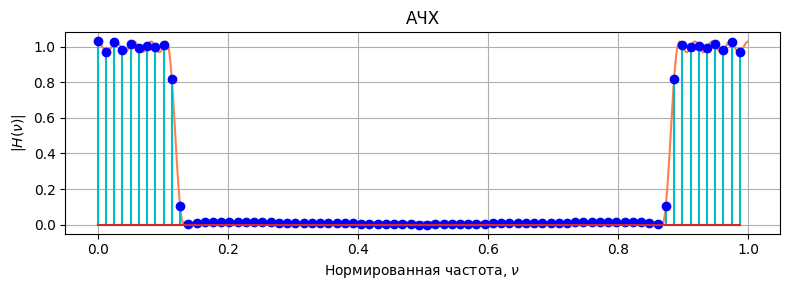

In [61]:
M=1024
H1=abs(np.fft.fft(h, M))

plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, H1, color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), linefmt='c', markerfmt='bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')
plt.tight_layout()

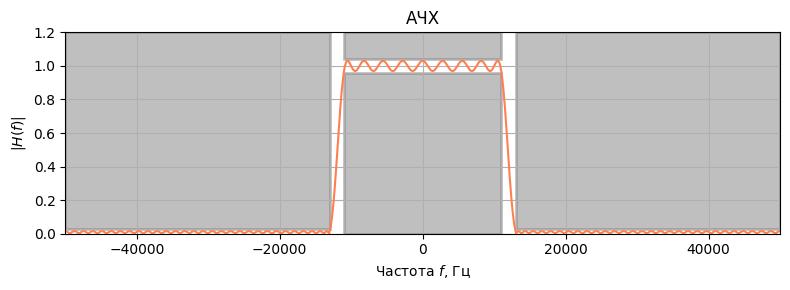

In [62]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

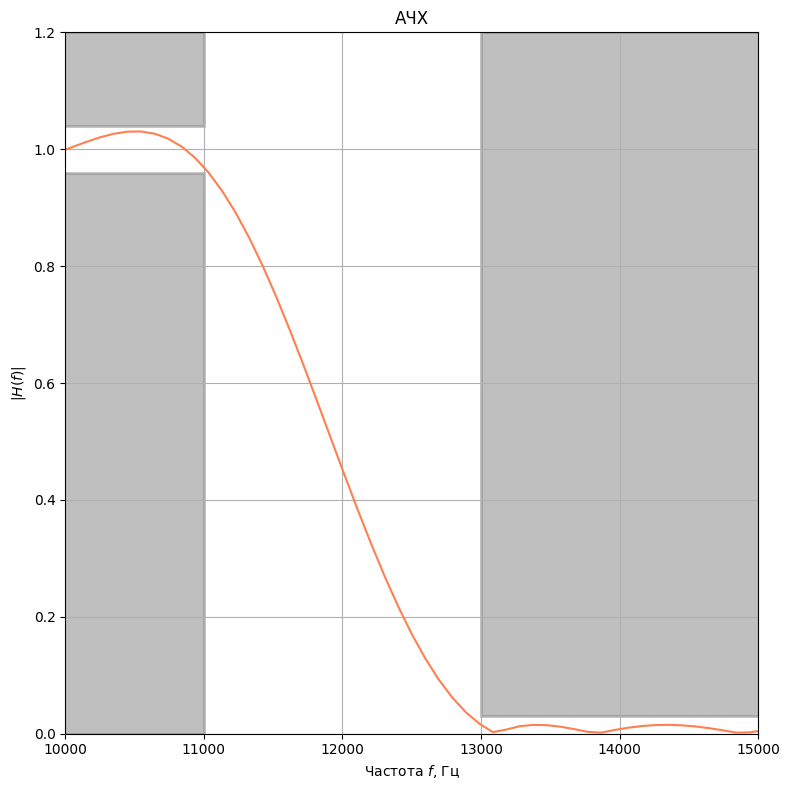

In [63]:
M=1024
plt.figure(figsize=[8, 8])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.xlim([10000, 15000])
plt.tight_layout()
plt.show()

#  Модуль 4. Фильтрация сигнала.

## Задача 4.1. Фильтрация АМ-сигнала, полученного с помощью цифрового осциллографа.
Установить в управляющей программе цифрового осциллографа следующие параметры. 
* Число выборок 1000, режим "Нормально".
* Пробник "х1".
* Частота дискретизации 100 кГц (Время/дел 1mS) или 200 кГц (Время/дел 0,5mS) в соответствии с вариантом задания. 
* Синхронизация "Вкл." и "Авто".
* Генератор: Генератор: режим "АМ/ЧМ", вид "~", диапазон "10K", размах колебания 4В. Частоту генератора выбрать в соответствии с вариантом из таблицы. Установить частоту несущей $f_0$ в соответствии с вариантом задания. 
* Модуляция генератора (меню "Настройки"): режим "АМ", коэффициент модуляции 70%, модулирующая частота 1кГц. 

Выполнить следующую последовательность действий. 
1) Пронаблюдать сигнал с амплитудной модуляцией. 
2) Записать выборки в текстовый файл.
3) Синтезировать КИХ-фильтр одним из рассмотренных методов так, чтобы его АЧХ удовлетворяла условиям задачи. При этом не обязательно использовать фильтр наименьшего возможного порядка. 
4) Провести фильтрацию сигнала. Сравнить сигналы и спектры сигналов до и после фильтрации.
5) Определить групповую задержку фильтра в мс. 
6) Синтезировать БИХ-фильтр Баттерворта, удовлетворяющий тем же требованиям. Сравнить результаты фильтрации сигналов КИХ-фильтром и БИХ-фильтром во временной области.

In [64]:
# Основные функции работы с файлами данных осциллографа
def oscilloscope_file_read(file, const_level=0):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
    return fs, signal_lev 

def analyse(fs, signal_lev, window='boxcar'):
    figsize=[8,4]
    plt.rcParams['font.size'] = '12'    
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#     plt.show()

<>:45: SyntaxWarning: invalid escape sequence '\D'
<>:45: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kirza\AppData\Local\Temp\ipykernel_19332\3604739448.py:45: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$x(k\Delta t)w[k]$, В")


In [65]:
# Дополнительные функции
def group_delay_plot(beta, alpha, fs=1):
    f, gd = signal.group_delay((beta, alpha), w=np.linspace(-fs/2, fs/2, num=2048), fs=fs)
    plt.figure(figsize=[8, 3])
    ax = plt.axes()
    plt.title('Групповая задержка фильтра')
    gd_mseconds=gd/fs*1e3
    plt.plot(f*1e-3, gd_mseconds, 'C3')
    plt.ylabel('$\\tau_{{гр}}$, мc')
    plt.xlim([-fs*1e-3*0.5, fs*1e-3*0.5])
    plt.ylim([0.0, max(gd_mseconds)*1.1])
    plt.xlabel('$f$, кГц')
    plt.grid()
    plt.tight_layout()
def compare(fs, signals=[], vline=None):
    figsize=[8,4]
    plt.figure(figsize=figsize)
    for color_index, signal_lev in enumerate(signals):
        plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-', color="C%i" %color_index)  
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    if not(vline is None):
        plt.axvline(x=vline*1e3, color='r')
    plt.tight_layout()
def dtft_plot(x, M=2048, fs=1.0, val_symbol="X"):
    X = abs(np.fft.fftshift(np.fft.fft(x, M)))
    f = np.fft.fftshift(np.fft.fftfreq(M, d=1.0/fs))
    figsize=[8,4]
    plt.figure(figsize=figsize)
    plt.plot(f*1e-3, X)
    plt.grid()
    plt.xlabel("$f$,  кГц")
    plt.ylabel("|$%s(f)|$" %val_symbol)

<>:22: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kirza\AppData\Local\Temp\ipykernel_19332\2129480052.py:22: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$x(k\Delta t)w[k]$, В")


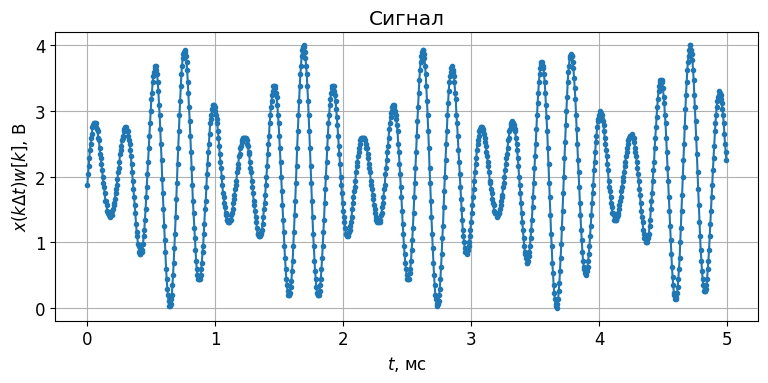

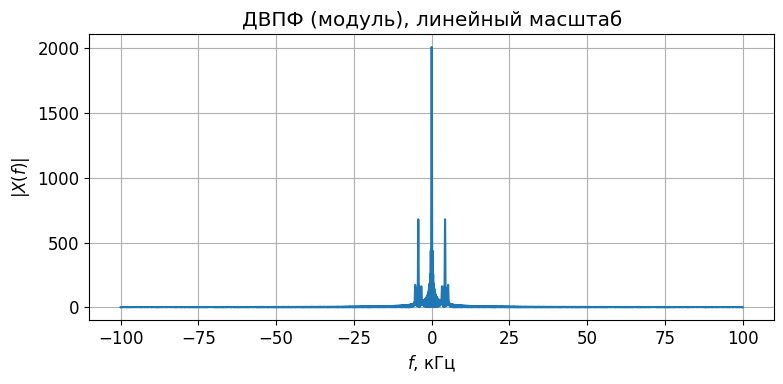

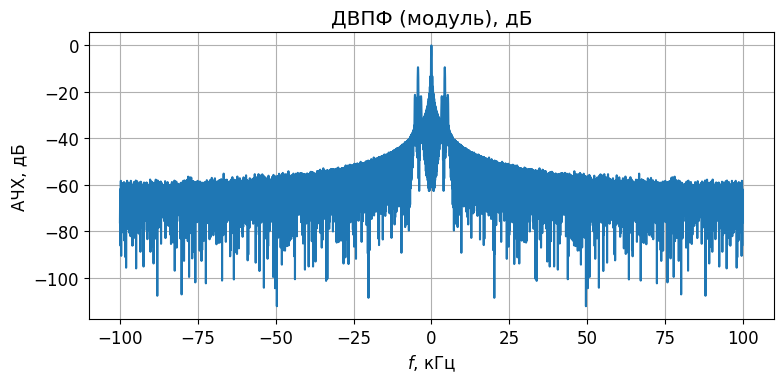

In [66]:
# Чтение сигнала из файла
fs, signal_lev = oscilloscope_file_read(file='0_5_ms.txt', const_level=0)
# Анализ сигнала
analyse(fs, signal_lev, window='boxcar')

In [67]:
fs

200000

In [68]:
f1=6300
f2=8300
cutoff=(f1+f2)/2 # 500
N=32  #48
h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='hann', pass_zero='lowpass', fs=fs)

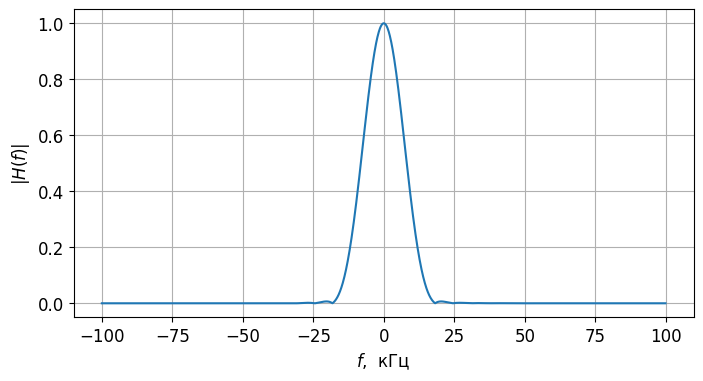

In [69]:
# АЧХ
dtft_plot(h, M=2048, fs=fs, val_symbol="H")

In [70]:
signal_output =signal.lfilter(b=h, a=[1], x=signal_lev, zi=None)

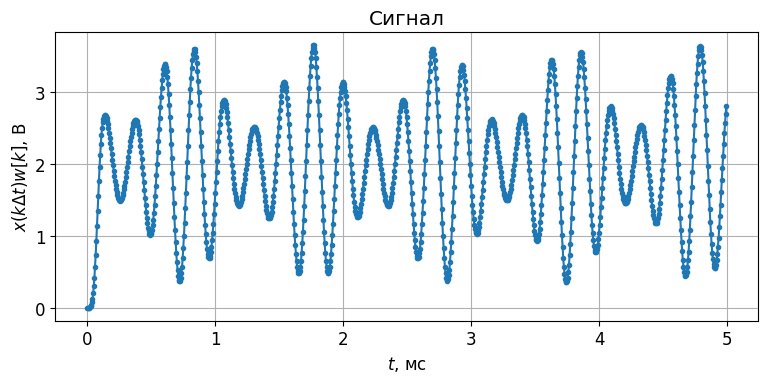

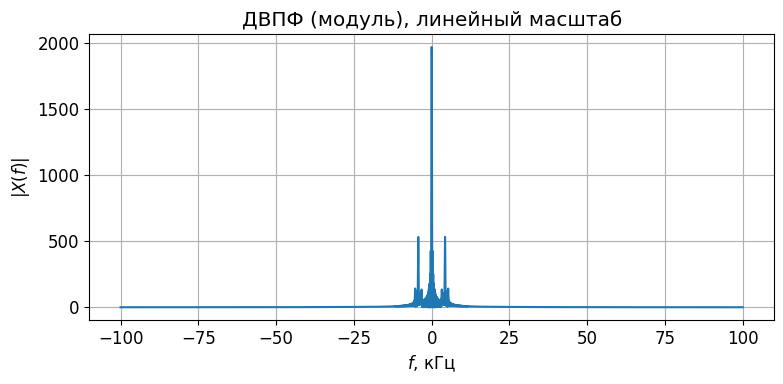

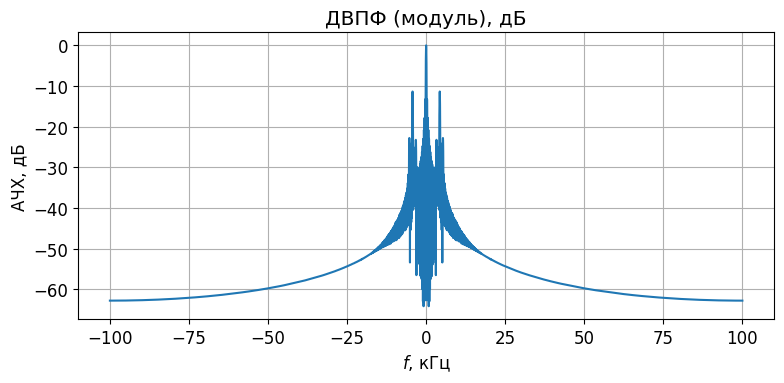

In [71]:
analyse(fs, signal_output, window='boxcar')

In [72]:
#Величина груповой задежки
(N-1)/2/fs

7.75e-05

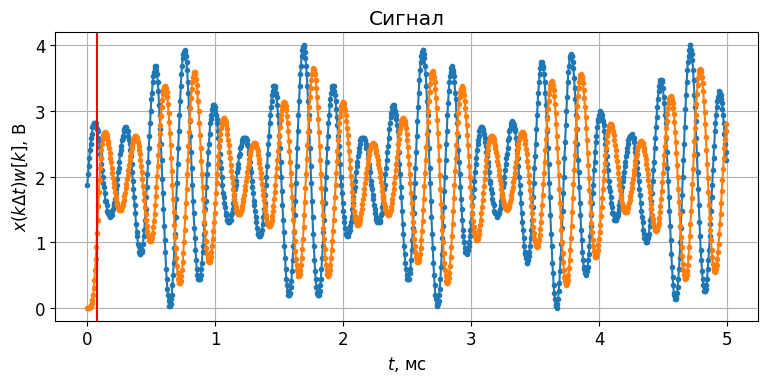

In [73]:
compare(fs, signals=[signal_lev, signal_output], vline=(N-1)/2.0/fs)

In [74]:
gpass=0.9151
gstop=20
N, Wn = signal.buttord(wp=f1, ws=f2, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
N, Wn, beta, alpha 

(11,
 np.float64(6726.1514331653925),
 array([9.06491400e-12, 9.97140540e-11, 4.98570270e-10, 1.49571081e-09,
        2.99142162e-09, 4.18799027e-09, 4.18799027e-09, 2.99142162e-09,
        1.49571081e-09, 4.98570270e-10, 9.97140540e-11, 9.06491400e-12]),
 array([ 1.00000000e+00, -9.51535742e+00,  4.12443336e+01, -1.07486665e+02,
         1.87119636e+02, -2.28463207e+02,  1.99613428e+02, -1.24799344e+02,
         5.47122074e+01, -1.60174025e+01,  2.81809505e+00, -2.25724928e-01]))

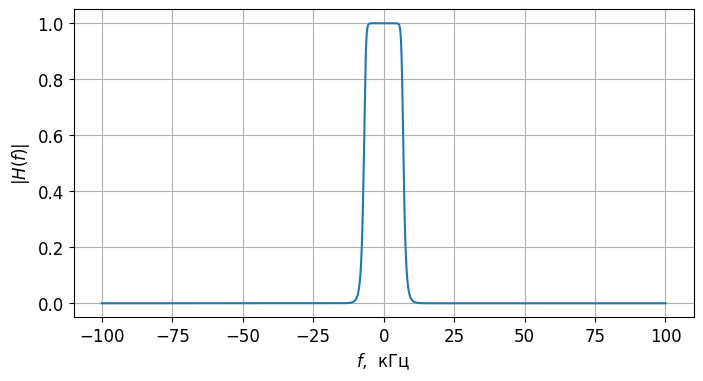

In [75]:
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
figsize=[8,4]
plt.figure(figsize=figsize)
plt.plot(f*1e-3, abs(H))
plt.grid()
plt.xlabel("$f$,  кГц")
plt.ylabel("|$H(f)|$")
plt.show()

C:\Users\kirza\AppData\Local\Temp\ipykernel_19332\2129480052.py:3: UserWarning: The filter's denominator is extremely small at frequencies [-3.142, -3.139, -3.135, -3.132, -3.129, -3.126, -3.123, -3.120, -3.117, -3.114, -3.111, -3.108, -3.105, -3.102, -3.099, -3.096, -3.092, -3.089, -3.086, -3.083, -3.080, -3.077, -3.074, -3.071, -3.068, -3.065, -3.062, -3.059, -3.056, -3.053, -3.050, -3.046, -3.043, -3.040, -3.037, -3.034, -3.031, -3.028, -3.025, -3.022, -3.019, -3.016, -3.013, -3.010, -3.007, -3.003, -3.000, -2.997, -2.994, -2.991, -2.988, -2.985, -2.982, -2.979, -2.976, -2.973, -2.970, -2.967, -2.964, -2.960, -2.957, -2.954, -2.951, -2.948, -2.945, -2.942, -2.939, -2.936, -2.933, -2.930, -2.927, -2.924, -2.921, -2.918, -2.914, -2.911, -2.908, -2.905, -2.902, -2.899, -2.896, -2.893, -0.250, -0.247, -0.244, -0.241, -0.238, -0.235, -0.232, -0.229, -0.226, -0.223, -0.219, -0.216, -0.213, -0.210, -0.207, -0.204, -0.201, -0.198, -0.195, -0.192, -0.189, -0.186, -0.183, -0.180, -0.176, -0.1

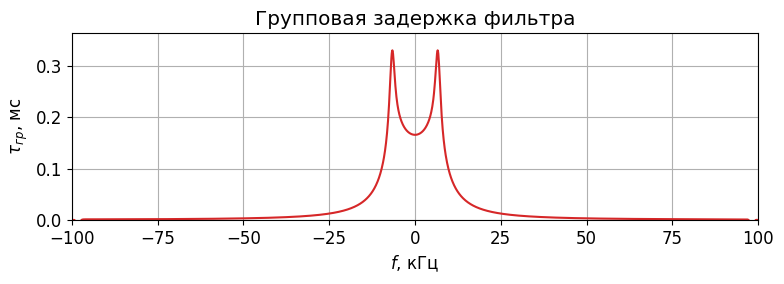

In [76]:
group_delay_plot(beta=beta, alpha=alpha, fs=fs)

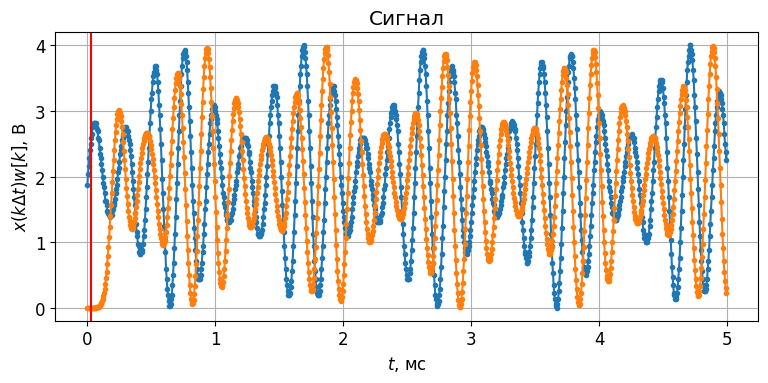

In [77]:
signal_output2 =signal.lfilter(b=beta, a=alpha, x=signal_lev, zi=None)
compare(fs, signals=[signal_lev, signal_output2], vline=(N-1)/2.0/fs)